## Summary
In this notebook we are going to build a fully connected neural network to solve a regression problem. The data is generated from a thrid degree polynomial and then noise is added. The neural network is build using Pytorch (https://pytorch.org/) and trined using Stochastic Gradient Descent.

Install and import libraries

In [2]:
!pip install torch
!pip install matplotlib
!pip install numpy
!pip install imageio

import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

     |████████████████████████████████| 71.1MB 389kB/s eta 0:00:01


The function third_degree_polynomial will return the output of a third degree polynomial.
The arguments are the input vector x and the coefficient vector.

In [3]:
def third_degree_polynomial(x, coefficient_vector):
    x_2 = torch.mul(x, x)
    x_3 = torch.mul(x_2, x)
    return  coefficient_vector[0] + torch.mul(coefficient_vector[1], x)\
          + torch.mul(coefficient_vector[2], x_2) + torch.mul(coefficient_vector[3], x_3)

Generate Data

In [4]:
torch.manual_seed(1) # make results reproducible

coefficients = np.array([1, -2, 3, -1]).T

x_train = torch.unsqueeze(torch.linspace(0, 2, 100), dim=1)
y_train = third_degree_polynomial(x_train, coefficients) + 0.2 * torch.rand(x_train.size())

x_test = torch.unsqueeze(torch.linspace(0, 2, 20), dim=1)
y_test = third_degree_polynomial(x_test, coefficients) + 0.2 * torch.rand(x_test.size())

# torch can only train to variable so convert to variable
x_train, y_train = Variable(x_train), Variable(y_train) 

 View Data

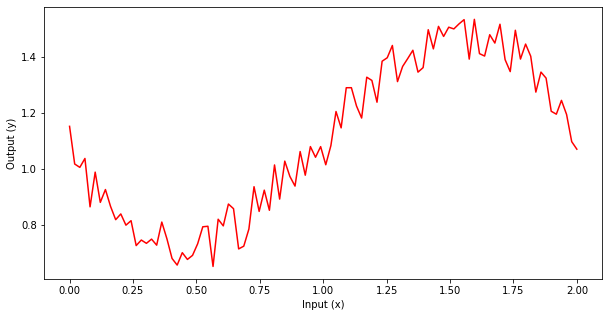

In [5]:
plt.figure(figsize=(10,5))
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'r')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.show()

Create Neural Network

In [6]:
class NeuralNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(NeuralNet, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # hidden layer
        self.output = torch.nn.Linear(n_hidden, n_output) # output layer
        
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.output(x)
        return x

Train the network

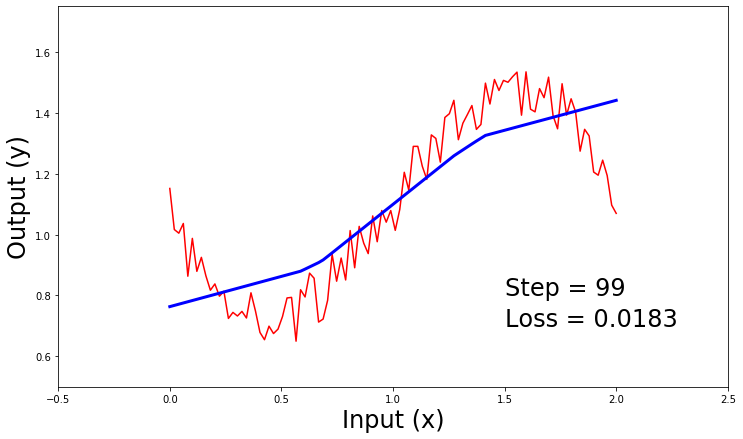

In [7]:
network = NeuralNet(n_feature=1, n_hidden=10, n_output=1)
optimizer = torch.optim.SGD(network.parameters(), lr=0.2)
loss_function = torch.nn.MSELoss()

images = []
fig, ax = plt.subplots(figsize=(12, 7))

for epoch in range(100):
    prediction = network(x_train)
    loss = loss_function(prediction, y_train)
        
    optimizer.zero_grad() # clear gradient for next train
    loss.backward() # backpropagation, compute the gradients
    optimizer.step() # update weights
    
    plt.cla()
    ax.set_xlabel('Input (x)', fontsize=24)
    ax.set_ylabel('Output (y)', fontsize=24)
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(0.5, 1.75)
    ax.plot(x_train.data.numpy(), y_train.data.numpy(), 'r')
    ax.plot(x_train.data.numpy(), prediction.data.numpy(), 'b-', lw=3)
    ax.text(1.5, 0.80, 'Step = %d' % epoch, fontdict={'size': 24, 'color':  'black'})
    ax.text(1.5, 0.70, 'Loss = %.4f' % loss.data.numpy(), fontdict={'size': 24, 'color':  'black'})
    
    # used to return the plot as an image array
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1]+(3,))
    
    images.append(image)

imageio.mimsave('../images/neuralnetfit.gif', images, fps=10)

Training and Test Error

In [8]:
y_train_prediction = network.forward(x_train)
y_test_prediction = network.forward(x_test)

train_loss = loss_function(y_train_prediction, y_train)
test_loss = loss_function(y_test_prediction, y_test)

print('Training Loss: ', str(train_loss.data.numpy()))
print('Test Loss: ', str(test_loss.data.numpy()))

Training Loss:  0.018203694
Test Loss:  0.0330062


Reference: https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379